# Weather Prediction Project

## Introduction
This project focuses on predicting weather patterns using machine learning techniques. By analyzing historical weather data and employing advanced algorithms, we aim to forecast weather conditions for a given location.

## Dataset
The project utilizes a comprehensive weather dataset containing various meteorological parameters such as temperature, humidity, wind speed, precipitation, and atmospheric pressure. The dataset covers a significant period, allowing us to capture seasonal and long-term weather patterns.

## Methodology
We follow a data-driven approach to develop accurate weather prediction models. The project involves the following steps:

1. Data Preprocessing: We clean and preprocess the dataset by handling missing values, normalizing data, and performing feature engineering to extract relevant weather features.

2. Exploratory Data Analysis: We conduct a thorough analysis of the dataset to identify patterns, correlations, and trends in the weather data. This analysis helps us gain insights into the underlying factors influencing weather conditions.

3. Model Development: We employ machine learning algorithms such as regression, time series analysis, and ensemble methods to train predictive models. These models learn from the historical weather data and generate forecasts based on input features.

4. Model Evaluation: We assess the performance of the developed models using appropriate evaluation metrics. This step ensures that our predictions are reliable and accurate.

5. Visualization: We use visualizations such as graphs, charts, and maps to present the predicted weather patterns effectively. These visual representations aid in understanding the predicted weather conditions visually.

## Results and Conclusion
The project aims to provide accurate weather predictions that can assist various stakeholders, including meteorologists, planners, and individuals planning outdoor activities. By leveraging machine learning techniques, we strive to enhance weather forecasting accuracy and contribute to improved decision-making in various weather-dependent domains.

Stay tuned for the exciting insights and predictions generated through our weather prediction project!


In [1]:
import pandas as pd

weather = pd.read_csv("Weather.csv", index_col="DATE")

In [2]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
1987-01-01,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,NaN,NaN,83,"H,,S",92.0,",,S",NaN,NaN
1987-01-02,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,0.00,"D,,S",84,"H,,S",93.0,",,S",76.0,",,S"
1987-01-03,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,NaN,NaN,82,"H,,S",NaN,NaN,NaN,NaN
1987-01-04,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,0.04,",,S",85,"H,,S",92.0,",,S",74.0,",,S"
1987-01-05,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,0.00,",,S",82,"H,,S",90.0,",,S",72.0,",,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,0.00,",,S",75,"H,,S",81.0,",,S",71.0,",,S"
2023-06-08,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,0.15,",,S",76,"H,,S",83.0,",,S",72.0,",,S"
2023-06-09,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,0.06,",,S",78,"H,,S",87.0,",,S",NaN,NaN


### Data Preprocessing: We clean and preprocess the dataset by handling missing values, normalizing data, and performing feature engineering to extract relevant weather features.

##### First The percentage of missing Data is Calculated

In [3]:
null_pcnt = weather.apply(pd.isnull).sum()/weather.shape[0]

In [4]:
null_pcnt*100

STATION             0.000000
NAME                0.000000
LATITUDE            0.000000
LONGITUDE           0.000000
ELEVATION           0.000000
PRCP               47.101390
PRCP_ATTRIBUTES    47.101390
TAVG                0.000000
TAVG_ATTRIBUTES     0.000000
TMAX               40.736782
TMAX_ATTRIBUTES    40.736782
TMIN               47.010937
TMIN_ATTRIBUTES    47.010937
dtype: float64

##### So, from the above results the columns with null values are;
* Precipitation Column - by 47%
* Precipitation attributes column - by 47%
* Maximum Temperature Column - by 40%
* Maximum Temperature attributes Column - by 40%
* Minimum Temperature Column - by 47%
* Minimum Temperature attributes Column - by 47%

##### Next step is to extract columns with less than 5% missing values, these are going to be the valid columns for the job, And by doing so the above columns are going to be eliminated.

In [5]:
valid_columns = weather.columns[null_pcnt < 0.05]

In [6]:
valid_columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'TAVG',
       'TAVG_ATTRIBUTES'],
      dtype='object')

##### Next is to modify our dataset so that it only contains the valid columns. 

In [7]:
weather = weather[valid_columns].copy()

In [8]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TAVG,TAVG_ATTRIBUTES
DATE,,,,,,,
1987-01-01,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S"
1987-01-02,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,84,"H,,S"
1987-01-03,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,82,"H,,S"
1987-01-04,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,85,"H,,S"
1987-01-05,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,82,"H,,S"
...,...,...,...,...,...,...,...
2023-06-07,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,75,"H,,S"
2023-06-08,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,76,"H,,S"
2023-06-09,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,78,"H,,S"


##### Next is to fill some of the valid columns that still have null values even though they passed the <0.05 test. Though in this case there arent such columns, as shown below.

In [9]:
weather = weather.ffill()

In [10]:
weather.apply(pd.isnull).sum()

STATION            0
NAME               0
LATITUDE           0
LONGITUDE          0
ELEVATION          0
TAVG               0
TAVG_ATTRIBUTES    0
dtype: int64

##### Next is to make sure that the columns are in the correct datatype, this is also essential in ML predictions, In our case all the columns are in good condition as it can be seen below.
* object - strings
* float64 - floating digits, 64 bits
* int64 - integer digits, 64 bits
* datetime64 - date and time, 64 bits


In [11]:
weather.dtypes

STATION             object
NAME                object
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
TAVG                 int64
TAVG_ATTRIBUTES     object
dtype: object

##### Without forgetting forgetting the index column, lets check if it is also in its correct data type.

In [12]:
weather.index

Index(['1987-01-01', '1987-01-02', '1987-01-03', '1987-01-04', '1987-01-05',
       '1987-01-06', '1987-01-07', '1987-01-08', '1987-01-09', '1987-01-10',
       ...
       '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05', '2023-06-06',
       '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11'],
      dtype='object', name='DATE', length=12161)

##### Its datatype is object, while the column is a date column, so let us change it to its correct datatype.

In [13]:
weather.index = pd.to_datetime(weather.index)

In [14]:
weather.index

DatetimeIndex(['1987-01-01', '1987-01-02', '1987-01-03', '1987-01-04',
               '1987-01-05', '1987-01-06', '1987-01-07', '1987-01-08',
               '1987-01-09', '1987-01-10',
               ...
               '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05',
               '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
               '2023-06-10', '2023-06-11'],
              dtype='datetime64[ns]', name='DATE', length=12161, freq=None)

##### We can check the dataset one last time before going to the next step, and here the index column can come in handy

In [15]:
weather.index.year.value_counts().sort_index()

1987    363
1988    363
1989    353
1990    333
1991    305
1992    238
1993    196
1994    289
1995    347
1996    350
1997    341
1998    319
1999    299
2000    243
2001    258
2002    309
2003    335
2004    334
2005    347
2006    356
2007    364
2008    349
2009    358
2010    290
2011    360
2012    365
2013    363
2014    361
2015    361
2016    364
2017    365
2018    363
2019    365
2020    366
2021    362
2022    365
2023    162
Name: DATE, dtype: int64

##### As the last process in checking for gaps in data, let us plot a line plot or a time series plot for a certain column.

<Axes: xlabel='DATE'>

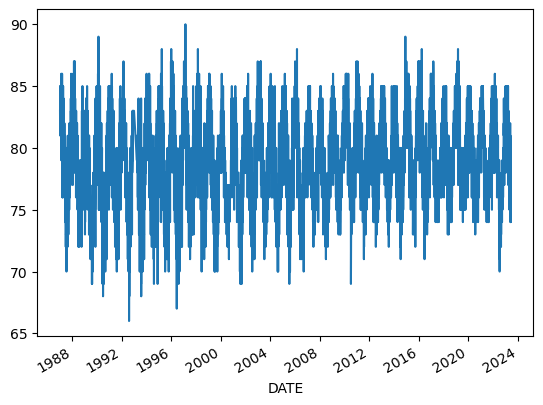

In [16]:
weather["TAVG"].plot()

### One thing to point out before heading to ML part is, I have used a local dataset from the year 1987 to june 2023 and since most columns had approximately 50% null data the columns were ommited during data cleaning and there is only one attribute left to predict and that is Avarage temperature.

### But changing a dataset or changing the time range for the dataset can lead to some columns coming back to life and hence make predictions for alot more variables.

##### In accordance to our dataset we are going to predict future's avarage temperature, And I am going to do so by first making the avarage temperature column the Target Column.

In [17]:
# The shift(-1) method takes the values of the specified column in the next row and place them in the target column.
weather["target"] = weather.shift(-1)["TAVG"]

In [18]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TAVG,TAVG_ATTRIBUTES,target
DATE,,,,,,,,
1987-01-01,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",84.0
1987-01-02,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,84,"H,,S",82.0
1987-01-03,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,82,"H,,S",85.0
1987-01-04,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,85,"H,,S",82.0
1987-01-05,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,82,"H,,S",82.0
...,...,...,...,...,...,...,...,...
2023-06-07,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,75,"H,,S",76.0
2023-06-08,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,76,"H,,S",78.0
2023-06-09,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,78,"H,,S",79.0


##### The target column contains the values of the next day's avarage temperature
##### And one may notice that the last value is missing and that is because there is no data after 11-06-2023, hence the use of ffill again

In [19]:
weather = weather.ffill()

In [20]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TAVG,TAVG_ATTRIBUTES,target
DATE,,,,,,,,
1987-01-01,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",84.0
1987-01-02,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,84,"H,,S",82.0
1987-01-03,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,82,"H,,S",85.0
1987-01-04,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,85,"H,,S",82.0
1987-01-05,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,82,"H,,S",82.0
...,...,...,...,...,...,...,...,...
2023-06-07,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,75,"H,,S",76.0
2023-06-08,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,76,"H,,S",78.0
2023-06-09,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,78,"H,,S",79.0


#### Importing the ML algorithm

In [21]:
from sklearn.linear_model import Ridge

### Now we employ Exploratory Data Analysis: We conduct a thorough analysis of the dataset to identify patterns, correlations, and trends in the weather data. This analysis will helps us gain insights into the underlying factors influencing weather conditions.

In [22]:
weather.corr()

/var/folders/8c/3bg3pnv954l_qjfxf3zkqnq00000gn/T/ipykernel_1808/2900882895.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,LATITUDE,LONGITUDE,ELEVATION,TAVG,target
LATITUDE,NaN,NaN,NaN,NaN,NaN
LONGITUDE,NaN,NaN,NaN,NaN,NaN
ELEVATION,NaN,NaN,NaN,NaN,NaN
TAVG,NaN,NaN,NaN,1.000000,0.813126
target,NaN,NaN,NaN,0.813126,1.000000


##### From the above analysis, we can observe that there is no correlation among the target and TAVG columns with the latitude, longitude and elevation column

### Model Development: We employ a machine learning algorithm known as Ridge Regression to train predictive models. These models learn from the historical weather data and generate forecasts based on input features.

##### First we initialize our ridge regression model, that by default has the functionality of taking into account the correlation and colinearity in a dataset as opposed to linear regression, and it has it parameter for that (alpha), that controls how much. the coefficients are shrunk to account for co-linearity

In [23]:
rr = Ridge(alpha=.1)

##### Next we need to apply the ridge regression model, and it done by doing two things
* Create a list of predictor columns
* 

In [24]:
predictors = weather.columns[~weather.columns.isin(["LATITUDE", "LONGITUDE", "ELEVATION", "target", "NAME", "STATION", "TAVG_ATTRIBUTES"])]

In [25]:
predictors

Index(['TAVG'], dtype='object')

#### A little bit of knowledge here, our data is a Time series data and this is because one day's data is closely linked to the next or previous day's data.
#### And in ML we use cross validation to try and estimate the error of a ML model but it is a different case with time series data where we have to be really carefull not to use the future data to predict the past, here we need to use a special technique called backtesting or time series cross validation for time series nature of data.

##### Below I create a function to perform the back testin and it will have the following parameters:
* Weather dataset
* The Ridge Regression model
* The predictors
* The start parameter indicating 10 year of data to start with, data we wanna take b4 we start making predictions.
* and the step size indicating every number of days a set of predictions will be created before going ahead

In [26]:
def backtesting(weather, model, predictors, start=3650, step=90):
    # Each element in the list is a dataframe containing predictions for 10 years
    all_predictions = [] 
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]  # all data before the current row
        test = weather.iloc[i:(i+step), :]  # the next 90 rows of data
        
        model.fit(train[predictors], train["target"])

        # returns a numpy array
        predictions = model.predict(test[predictors]) 

        # convert to a pandas series
        predictions = pd.Series(predictions, index=test.index)
        
        # concatenate real test data with predictions. axis=1, means treat each of these as a separate column in a single dataframe
        combined = pd.concat([test["target"], predictions], axis=1) 
        
        # Name columns of the resulting dataset
        combined.columns = ["actual", "predictions"]
        
        # Add a difference column
        combined["difference"] = (combined["predictions"] - combined["actual"]).abs()
        
        # Append all predictions
        all_predictions.append(combined)
        
    # Join all predictions into a single dataframe
    all_predictions_dataframe = pd.concat(all_predictions)
    
    return all_predictions_dataframe


#### Next is to make predictions by calling our function, this is done by passing variables;
* Weather
* Ridge regression model rr
* predictors

In [27]:
predictions = backtesting(weather, rr, predictors)

In [28]:
predictions

,actual,predictions,difference
DATE,,,
1998-07-12,76.0,78.064741,2.064741
1998-07-13,76.0,76.582565,0.582565
1998-07-15,73.0,76.582565,3.582565
1998-07-16,76.0,74.359300,1.640700
1998-07-17,75.0,76.582565,1.582565
...,...,...,...
2023-06-07,76.0,75.744140,0.255860
2023-06-08,78.0,76.557724,1.442276
2023-06-09,79.0,78.184891,0.815109


### Model Evaluation: We assess the performance of the developed models using appropriate evaluation metrics, which in our case is Mean Absolute Error (MAE). This step ensures that our predictions are reliable and accurate.

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["predictions"])

1.4023023254524825

##### Or instead of MAE in our case we can just take the mean of the difference column

In [30]:
predictions["difference"].mean()

1.4023023254524825

#### From the above Results it means I was One degrees off from the avarage temperature (TAVG),  the predictions deviated from the actual values by approximately 1.4023 units. 
#### From there the next task might be to generate Predictors that might improve the accuracy of our model. This is done by the computing role function that finds the rolling avarages of certain columns for a number of days. The variables in the function are;
* weather dataset.
* horizon - number of days we wanna compute the rolling avarage for.
* col - columns we wanna compute the avarage on.

In [31]:
def percentage_difference(new, old):
    return (new - old)/old

# A function to help find rolling avarages for the past few days (5 or 15 or number of your liking)
def compute_rolling(weather, horizon, col):
    # This lable is the name of the new column to be created in our data frame
    label = f"rolling_{horizon}_{col}"
    
    # Creating a new column containing the rolling mean of the values
    weather[label] = weather[col].rolling(horizon).mean()
    
    # now we calculate the percentage difference
    weather[f"{label}_pct"] = percentage_difference(weather[label], weather[col])
    return weather

rolling_horizons = [3,10]

# This will add new columns to our dataset
for horizon in rolling_horizons:
    for col in ["TAVG"]:
        weather = compute_rolling(weather, horizon, col)

In [32]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TAVG,TAVG_ATTRIBUTES,target,rolling_3_TAVG,rolling_3_TAVG_pct,rolling_10_TAVG,rolling_10_TAVG_pct
DATE,,,,,,,,,,,,
1987-01-01,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",84.0,NaN,NaN,NaN,NaN
1987-01-02,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,84,"H,,S",82.0,NaN,NaN,NaN,NaN
1987-01-03,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,82,"H,,S",85.0,83.000000,0.012195,NaN,NaN
1987-01-04,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,85,"H,,S",82.0,83.666667,-0.015686,NaN,NaN
1987-01-05,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,82,"H,,S",82.0,83.000000,0.012195,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,75,"H,,S",76.0,75.666667,0.008889,77.1,0.028000
2023-06-08,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,76,"H,,S",78.0,76.333333,0.004386,76.9,0.011842
2023-06-09,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,78,"H,,S",79.0,76.333333,-0.021368,76.7,-0.016667


#### From the above results we notice that some values are none and this is because for a specific horizon value specified the number of days were not yet reached.

#### And so the rows with null values have to be eliminated, and the number of rows to be eliminated depends on the largest value of the horizon.

In [33]:
# iloc indexes by number, loc indexes by the index column
weather = weather.iloc[10:,:]

In [34]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TAVG,TAVG_ATTRIBUTES,target,rolling_3_TAVG,rolling_3_TAVG_pct,rolling_10_TAVG,rolling_10_TAVG_pct
DATE,,,,,,,,,,,,
1987-01-11,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",83.0,82.333333,-0.008032,82.8,-0.002410
1987-01-12,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",83.0,82.666667,-0.004016,82.7,-0.003614
1987-01-13,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",83.0,83.000000,0.000000,82.8,-0.002410
1987-01-14,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",85.0,83.000000,0.000000,82.6,-0.004819
1987-01-15,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,85,"H,,S",82.0,83.666667,-0.015686,82.9,-0.024706
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,75,"H,,S",76.0,75.666667,0.008889,77.1,0.028000
2023-06-08,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,76,"H,,S",78.0,76.333333,0.004386,76.9,0.011842
2023-06-09,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,78,"H,,S",79.0,76.333333,-0.021368,76.7,-0.016667


#### Now we can add a couple more predictors

In [35]:
# the below function is going to look at each row in the dataframe and then take all the previous rows and that row and
# then take the mean of all of those rows together
def expand_mean(df):
    return df.expanding(1).mean()

# The loop is to be used to create 2 new columns, depending on the no of cols specified in the below loop
for col in ["TAVG"]:
    # The below is going to go through our data, group it by month, then ot os going to go one by one
    # through each date and find the mean b4 that date
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

/var/folders/8c/3bg3pnv954l_qjfxf3zkqnq00000gn/T/ipykernel_1808/2611211636.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.loc[:, f"month_avg_{col}"] = weather.loc[:, col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
/var/folders/8c/3bg3pnv954l_qjfxf3zkqnq00000gn/T/ipykernel_1808/2611211636.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.loc[:, f"day_avg_{col}"] = weather.loc[:, col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)


In [36]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TAVG,TAVG_ATTRIBUTES,target,rolling_3_TAVG,rolling_3_TAVG_pct,rolling_10_TAVG,rolling_10_TAVG_pct,month_avg_TAVG,day_avg_TAVG
DATE,,,,,,,,,,,,,,
1987-01-11,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",83.0,82.333333,-0.008032,82.8,-0.002410,83.000000,83.000000
1987-01-12,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",83.0,82.666667,-0.004016,82.7,-0.003614,83.000000,83.000000
1987-01-13,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",83.0,83.000000,0.000000,82.8,-0.002410,83.000000,83.000000
1987-01-14,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",85.0,83.000000,0.000000,82.6,-0.004819,83.000000,83.000000
1987-01-15,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,85,"H,,S",82.0,83.666667,-0.015686,82.9,-0.024706,83.400000,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,75,"H,,S",76.0,75.666667,0.008889,77.1,0.028000,76.135108,77.055556
2023-06-08,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,76,"H,,S",78.0,76.333333,0.004386,76.9,0.011842,76.134975,76.857143
2023-06-09,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,78,"H,,S",79.0,76.333333,-0.021368,76.7,-0.016667,76.136811,76.285714


#### Now we have a new set of predictors, now it is time to re run our model to obtain better results

In [37]:
predictors = weather.columns[~weather.columns.isin(["LATITUDE", "LONGITUDE", "ELEVATION", "target", "NAME", "STATION", "TAVG_ATTRIBUTES"])]

In [38]:
predictions = backtesting(weather, rr, predictors)

In [39]:
predictions

,actual,predictions,difference
DATE,,,
1998-07-25,78.0,74.369733,3.630267
1998-07-26,77.0,75.381023,1.618977
1998-07-27,73.0,75.312475,2.312475
1998-07-28,73.0,74.426881,1.426881
1998-07-30,73.0,74.135205,1.135205
...,...,...,...
2023-06-07,76.0,76.230890,0.230890
2023-06-08,78.0,76.517227,1.482773
2023-06-09,79.0,76.948030,2.051970


In [40]:
mean_absolute_error(predictions["actual"], predictions["predictions"])

1.2268162798756372

In [41]:
predictions["difference"].mean()

1.2268162798756372

#### As it can be seen above the MAE has reduced to approx 1.2268

In [42]:
predictions.sort_values("difference", ascending=False)

,actual,predictions,difference
DATE,,,
2019-03-02,77.0,84.786406,7.786406
2006-02-28,76.0,83.706411,7.706411
2019-12-16,76.0,83.572907,7.572907
2018-02-28,77.0,84.141386,7.141386
2002-02-21,76.0,83.076019,7.076019
...,...,...,...
2016-05-04,80.0,79.999101,0.000899
2017-07-25,76.0,76.000666,0.000666
2001-04-10,79.0,79.000373,0.000373


##### Above we get to see the days where There was a great difference between the predicted value and the true value

#### Next we can perform Diagnostics on the datafrmae to see where it brought large errors and why, and this is done below by;
* slicing a dataframe
* Ploting a graph to view

##### For example to view the largest error we;

In [43]:
weather.loc["2019-02-25":"2019-03-09"]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TAVG,TAVG_ATTRIBUTES,target,rolling_3_TAVG,rolling_3_TAVG_pct,rolling_10_TAVG,rolling_10_TAVG_pct,month_avg_TAVG,day_avg_TAVG
DATE,,,,,,,,,,,,,,
2019-02-25,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,85,"H,,S",85.0,83.666667,-0.015686,83.9,-0.012941,82.703218,82.620690
2019-02-26,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,85,"H,,S",85.0,84.333333,-0.007843,83.9,-0.012941,82.705952,83.000000
2019-02-27,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,85,"H,,S",85.0,85.000000,0.000000,83.9,-0.012941,82.708680,83.066667
2019-02-28,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,85,"H,,S",84.0,85.000000,0.000000,83.9,-0.012941,82.711401,82.483871
2019-03-01,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,84,"H,,S",88.0,84.666667,0.007937,83.8,-0.002381,81.615385,82.344828
2019-03-02,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,88,"H,,S",77.0,85.666667,-0.026515,84.1,-0.044318,81.622706,82.571429
2019-03-03,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,77,"H,,S",83.0,83.000000,0.077922,83.6,0.085714,81.617411,82.896552
2019-03-04,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,83,"H,,S",86.0,82.666667,-0.004016,83.8,0.009639,81.618993,82.518519
2019-03-05,TZ000063894,"DAR ES SALAAM AIRPORT, TZ",-6.867,39.2,53.0,86,"H,,S",84.0,82.000000,-0.046512,84.1,-0.022093,81.624000,82.535714


#### You can observe values above and below 2019-03-02

In [45]:
predictions["difference"].round().value_counts()

1.0    3570
0.0    2309
2.0    1735
3.0     557
4.0     226
5.0      66
6.0      30
7.0       5
8.0       3
Name: difference, dtype: int64

In [46]:
predictions["difference"].round().value_counts().sort_index()

0.0    2309
1.0    3570
2.0    1735
3.0     557
4.0     226
5.0      66
6.0      30
7.0       5
8.0       3
Name: difference, dtype: int64

<Axes: >

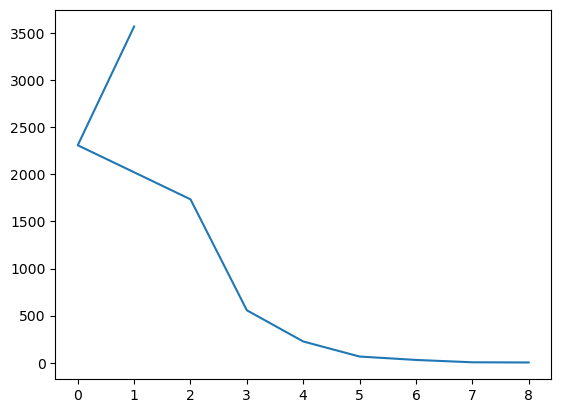

In [47]:
predictions["difference"].round().value_counts().plot()

### From the above diagnosis we have observed the reason for the errors in our predictions, though a 1.2268 MAE is pretty good value, so we are good.

### Below are some of what can be done as a way forward to tackle the errors and make the model more efficient
* Add more predictor columns like month_avg_TAVG and day_avg_TAVG.
* Also one can take a look at rolling avarages and see if one can do more there.
* Also can look at how we began, some of the columns that were eliminated due to null values could really be useful if processed differently.
* The other thing to do is to change to a different more effective model.

## Done by Gabriel D Minzemalulu
## Email: gabrieldee77@gmail.com